## Modelling

### Importing Libraries

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import joblib

### Importing Data

In [8]:
df = pd.read_csv('../assets/cleaned_data.csv')

In [10]:
df.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,2,3,4,5,6,7,8,9,10
0,0.392157,0.577966,0.898990,0.469388,0.104241,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,0.058824,0.407172,0.595960,0.836735,0.031870,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,0.823529,0.804950,0.292929,0.551020,0.418420,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0.431373,0.142495,0.737374,0.081633,0.992106,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
4,0.921569,0.922047,0.202020,0.489796,0.340308,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


### Modelling the Data

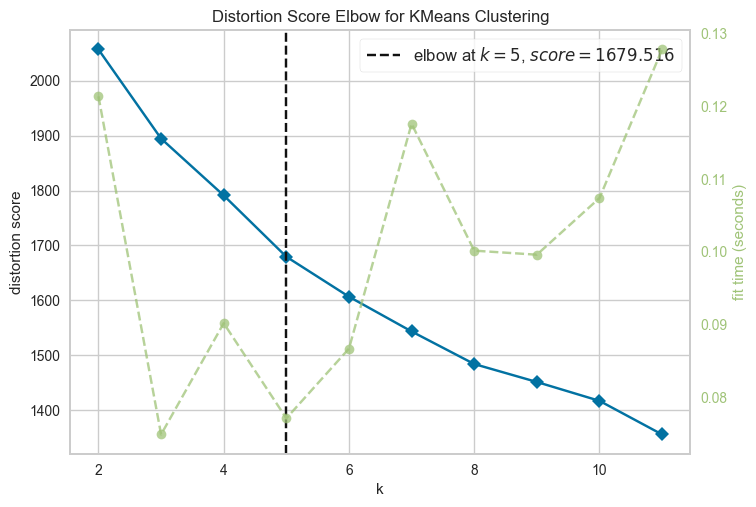

In [119]:
km = KMeans(random_state=4)
visualizer = KElbowVisualizer(km, k=(2,12))
 
visualizer.fit(df)
visualizer.show();

In [115]:
range_n_clusters = [2,3,4,5,6,7,8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=4)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))

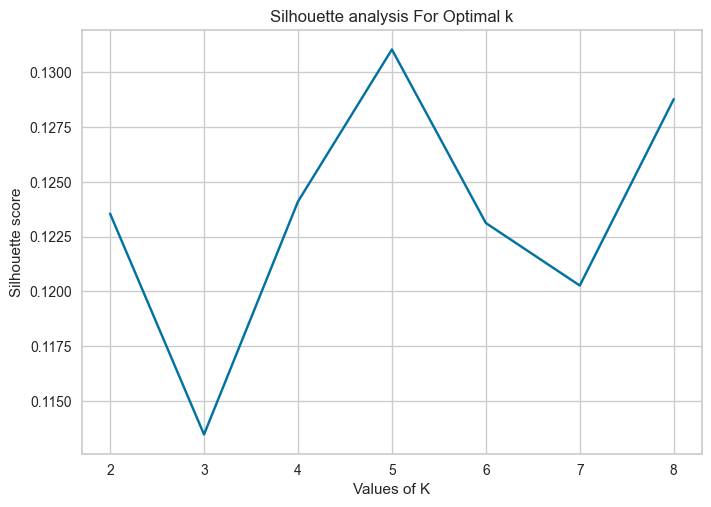

In [117]:
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=4))

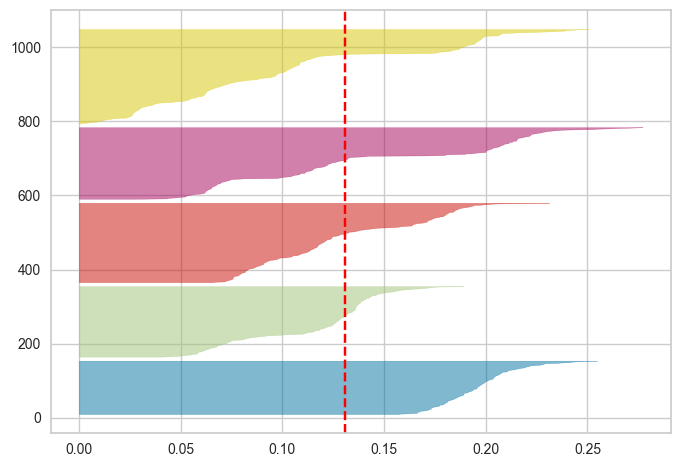

In [125]:
km = KMeans(n_clusters=5, random_state=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df)

In [131]:
km.fit(df)
cluster_labels = km.labels_

In [135]:
clusters = pd.DataFrame(cluster_labels)
clusters.head()

,0
0,4
1,3
2,4
3,1
4,2


In [157]:
df_seg = pd.concat([df,clusters], axis=1)
df_seg.head()

,Scaledage,Scaledincome,Scaledspending_score,Scaledpurchase_frequency,Scaledlast_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,...,2,3,4,5,6,7,8,9,10,0
0,0.392157,0.577966,0.898990,0.469388,0.104241,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,4
1,0.058824,0.407172,0.595960,0.836735,0.031870,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,3
2,0.823529,0.804950,0.292929,0.551020,0.418420,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,4
3,0.431373,0.142495,0.737374,0.081633,0.992106,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,0.921569,0.922047,0.202020,0.489796,0.340308,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,2


In [159]:
scaler = joblib.load('../assets/scaler.gz')

In [161]:
df_seg[['age','income','spending_score','purchase_frequency','last_purchase_amount']] = scaler.inverse_transform(df_seg[['Scaledage','Scaledincome','Scaledspending_score','Scaledpurchase_frequency','Scaledlast_purchase_amount']]) 

In [165]:
df_seg.drop(['Scaledage','Scaledincome','Scaledspending_score','Scaledpurchase_frequency','Scaledlast_purchase_amount'], inplace=True, axis=1)
df_seg.head()

,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,2,3,4,5,...,7,8,9,10,0,age,income,spending_score,purchase_frequency,last_purchase_amount
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,4,38.0,99342.0,90.0,24.0,113.53
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,3,21.0,78852.0,60.0,42.0,41.93
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,4,60.0,126573.0,30.0,28.0,424.36
3,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,1,40.0,47099.0,74.0,5.0,991.93
4,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,2,65.0,140621.0,21.0,25.0,347.08


In [ ]:
summary = df_seg.groupby("0").agg(
    Count=("Value1", "count"),
    Total_Value1=("Value1", "sum"),
    Avg_Value2=("Value2", "mean")
)